In [1]:
!pip3 install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 22.8.0a0+304.g6ca81bbc78.dirty requires protobuf<3.21.0a0,>=3.20.1, but you have protobuf 3.19.6 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

2023-01-02 13:01:00.320989: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir='foodclassfication/Food Classification'
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 6273 files belonging to 21 classes.


2023-01-02 13:01:14.087669: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 13:01:14.215852: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14767 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:af:00.0, compute capability: 7.0


In [3]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [4]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = (228,228),
    batch_size =32,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = (228,228),
    batch_size =32,
    class_mode='categorical',
    subset = 'validation')

Found 5026 images belonging to 21 classes.
Found 1247 images belonging to 21 classes.


In [6]:
import tensorflow as tf
from tensorflow.python.compiler.tensorrt import trt_convert as trt
from tensorflow.keras.applications.resnet50 import ResNet50

# Load model0
model = ResNet50(weights='imagenet')
model

In [7]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [8]:
input=model.output
output = Dense(20, activation='softmax')(input)
model = Model(inputs = model.input, outputs = output)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [11]:
#checkpoint = tf.keras.callbacks.ModelCheckpoint('rajesh/saved/model{epoch:08d}.pth', save_freq=10) 
history = model.fit(train_data,validation_data=val_data,epochs=270,batch_size=32)

Epoch 1/270


2022-12-28 13:49:27.388106: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700


158/158 [==============================] - 214s 1s/step - loss: 2.9790 - accuracy: 0.0894 - val_loss: 2.9861 - val_accuracy: 0.0658
Epoch 2/270
158/158 [==============================] - 204s 1s/step - loss: 2.9445 - accuracy: 0.1031 - val_loss: 2.9850 - val_accuracy: 0.0658
Epoch 3/270
158/158 [==============================] - 205s 1s/step - loss: 2.9192 - accuracy: 0.1148 - val_loss: 2.9879 - val_accuracy: 0.0658
Epoch 4/270
158/158 [==============================] - 207s 1s/step - loss: 2.9001 - accuracy: 0.1112 - val_loss: 2.9878 - val_accuracy: 0.0714
Epoch 5/270
158/158 [==============================] - 205s 1s/step - loss: 2.8840 - accuracy: 0.1138 - val_loss: 2.9387 - val_accuracy: 0.0819
Epoch 6/270
158/158 [==============================] - 205s 1s/step - loss: 2.8506 - accuracy: 0.1238 - val_loss: 3.0469 - val_accuracy: 0.0530
Epoch 7/270
158/158 [==============================] - 206s 1s/step - loss: 2.8156 - accuracy: 0.1347 - val_loss: 2.9831 - val_accuracy: 0.0738
Epoc

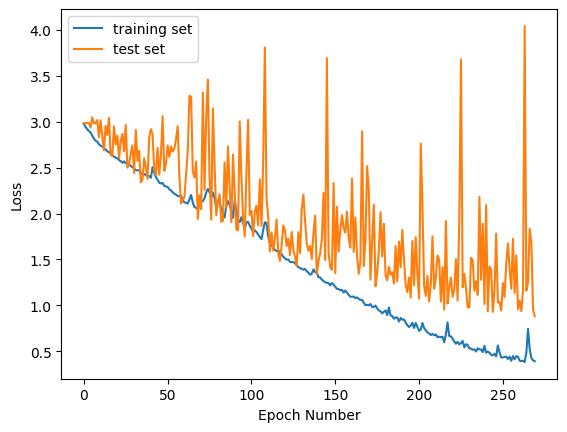

In [12]:
#new
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

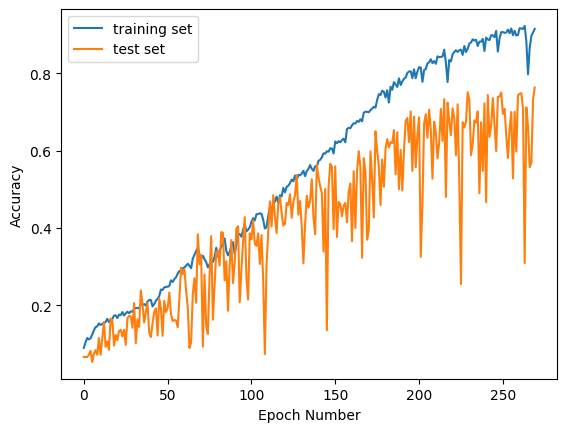

In [13]:
#new
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [39]:
!mkdir -p saved_model
model.save('saved_model/Food_Cllasification_model')

INFO:tensorflow:Assets written to: saved_model/Food_Cllasification_model/assets


INFO:tensorflow:Assets written to: saved_model/Food_Cllasification_model/assets


In [1]:
from tensorflow import keras
model = keras.models.load_model('Model_deployment/Food_Cllasification_model')

2023-01-03 09:59:57.578476: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 10:00:00.280010: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 10:00:00.425236: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14767 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:af:00.0, compute capability: 7.0


In [2]:
pwd

'/workspace/rajesh'

In [5]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [2]:
# classes = ['burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'idli', 'jalebi', 
#            'kaathi_rolls','kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa']
# classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

In [10]:
predict_image('foodclassfication/Food Classification/instant-pot-boiled-dal.jpg',model)

1/1 [==============================] - 0s 51ms/step


'Prediction - idli'

In [11]:
predict_image('foodclassfication/Food Classification/masala_dosa/004.jpg',model)

1/1 [==============================] - 0s 38ms/step


'Prediction - masala_dosa'

2023-01-03 10:00:23.820612: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700


1/1 [==============================] - 1s 1s/step


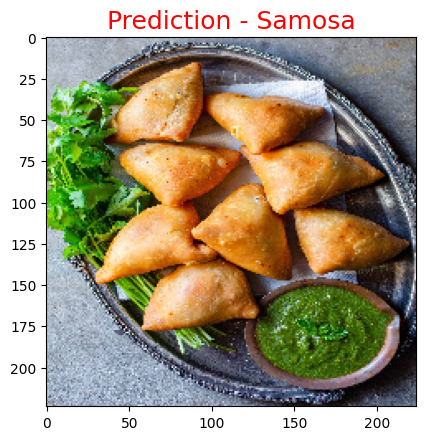

In [4]:

predict_image('foodclassfication/Food Classification/samosa/019.jpg',model)

1/1 [==============================] - 0s 81ms/step


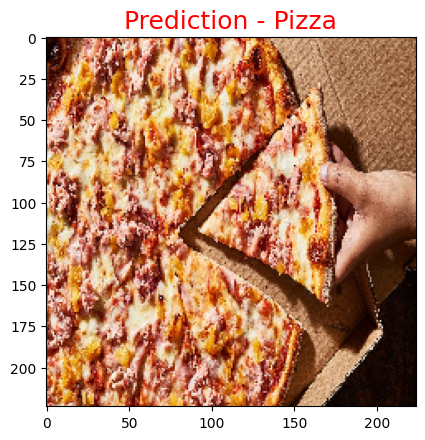

In [5]:

predict_image('foodclassfication/Food Classification/pizza/019.jpg',model)

1/1 [==============================] - 0s 47ms/step


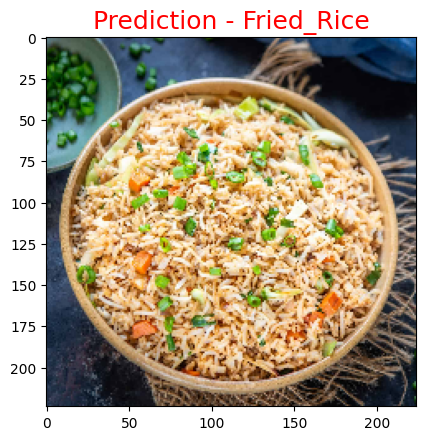

In [6]:

predict_image('foodclassfication/Food Classification/fried_rice/008.jpg',model)

1/1 [==============================] - 0s 42ms/step


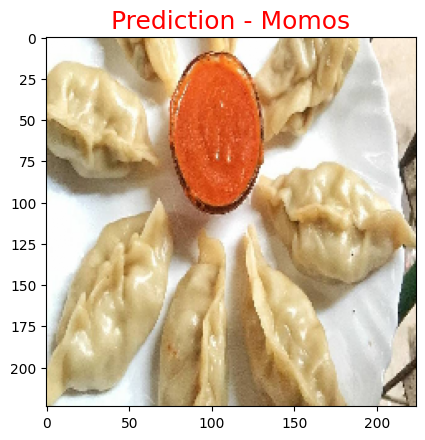

In [7]:
predict_image('foodclassfication/Food Classification/momos/051.jpg',model)

1/1 [==============================] - 0s 44ms/step


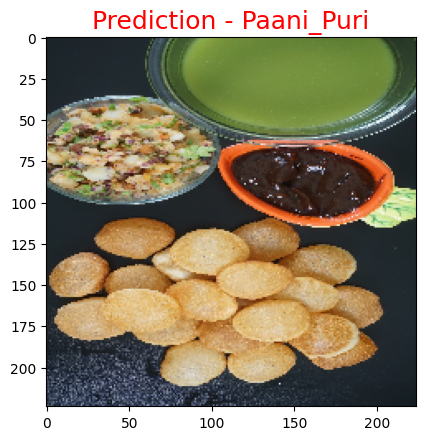

In [8]:
predict_image('foodclassfication/Food Classification/paani_puri/028.jpg',model)

1/1 [==============================] - 0s 46ms/step


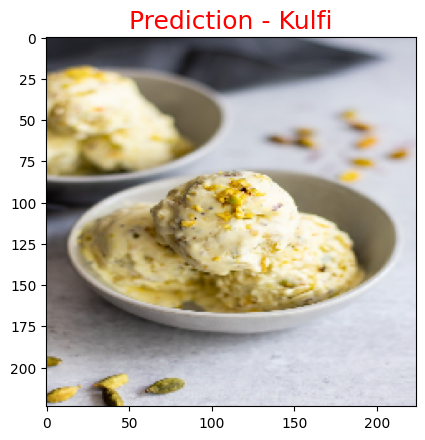

In [46]:

predict_image('foodclassfication/Food Classification/kulfi/039.jpg',model)

1/1 [==============================] - 0s 41ms/step


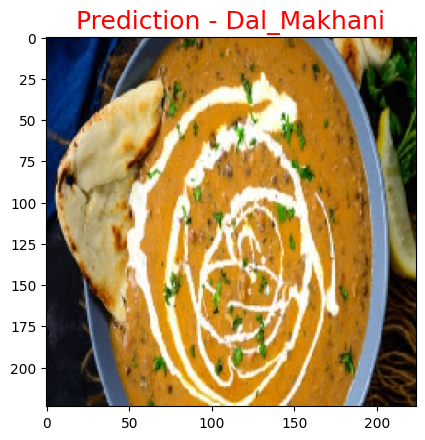

In [35]:

predict_image('foodclassfication/Food Classification/dal_makhani/005.jpg',model)

1/1 [==============================] - 0s 46ms/step


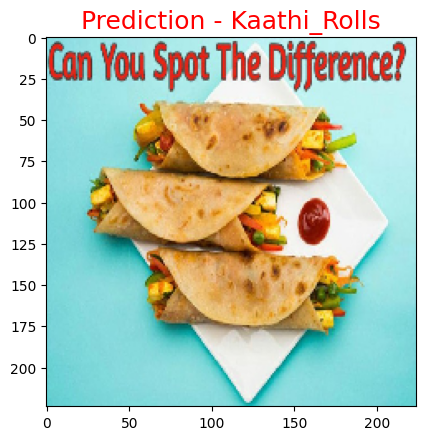

In [47]:

predict_image('foodclassfication/Food Classification/kaathi_rolls/172.jpg',model)

1/1 [==============================] - 0s 45ms/step


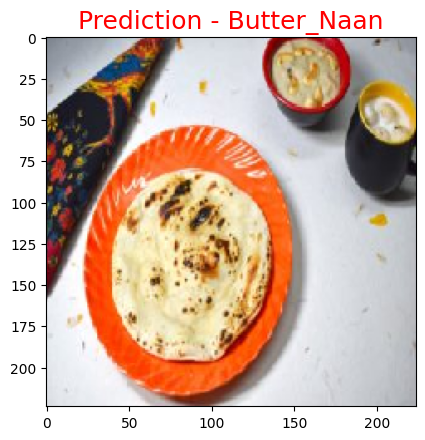

In [54]:

predict_image('foodclassfication/Food Classification/butter_naan/083.jpg',model)

1/1 [==============================] - 0s 61ms/step


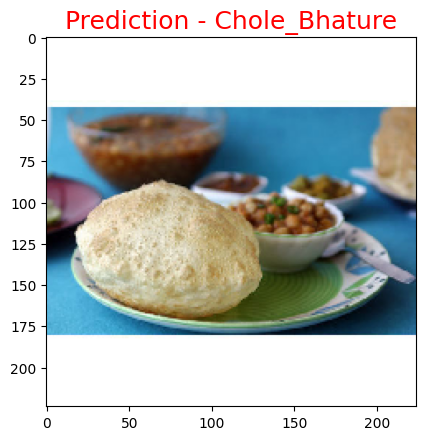

In [57]:

predict_image('foodclassfication/Food Classification/chole_bhature/118.jpg',model)